<a href="https://colab.research.google.com/github/kmk028/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [2]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [3]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [0]:
def start():
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 50,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False,
            'float_format': lambda x: '%.3f' % x
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }

    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+

start()

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [0]:
#Create a dictionary of data frames instead of reading each one. 

csv_dict = {
    'income': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv',
    'lifespan': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv',
    'population': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv',
    'entities': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv',
    'concepts': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv'
}

dfs = {}

for k in csv_dict:
  dfs[k] = pd.read_csv(csv_dict[k])

In [0]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

In [0]:
income.head()

In [0]:
lifespan.head()

In [0]:
population.head()

In [0]:
pd.options.display.max_columns = 500
entities.head()

In [0]:
concepts.head()

## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [7]:
# "Year country  region income lifespan population" are the columns we need 

#income population and lifespan have same common columns so we can use merge

df_v2 = dfs['income'].merge(dfs['lifespan']).merge(dfs['population'])

df_v2.head()


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.210,3280000
1,afg,1801,603,28.200,3280000
2,afg,1802,603,28.190,3280000
3,afg,1803,603,28.180,3280000
4,afg,1804,603,28.170,3280000


In [8]:
help(pd.merge)


Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right frame, similar to a SQL right outer join;
          preserve key 

In [11]:
# now to merge df_v2 with needed columns from entities ('name', 'world_6region')

df = pd.merge(df_v2, dfs['entities'][['country','name', 'world_6region']], left_on='geo',right_on='country')

# drop unwanted columns
df = df.drop(columns=['geo', 'country'])

df.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,603,28.210,3280000,Afghanistan,south_asia
1,1801,603,28.200,3280000,Afghanistan,south_asia
2,1802,603,28.190,3280000,Afghanistan,south_asia
3,1803,603,28.180,3280000,Afghanistan,south_asia
4,1804,603,28.170,3280000,Afghanistan,south_asia


In [13]:
# rename columns

col_name_map = {
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan', 
    'population_total': 'population', 
    'name': 'country', 
    'world_6region': 'region'
}

df = df.rename(columns=col_name_map)
df.sample(10)

,year,income,lifespan,population,country,region
5227,1943,2717,52.650,189050,Barbados,america
16583,1864,1056,25.250,208404719,India,south_asia
16518,2018,11650,72.030,266794980,Indonesia,east_asia_pacific
1543,1982,8474,71.540,72448,Antigua and Barbuda,america
35332,1951,1050,37.420,1425487,Togo,sub_saharan_africa
15459,1835,819,33.900,221412,Honduras,america
16877,1939,5375,59.720,2917772,Ireland,europe_central_asia
8977,1970,9157,72.000,8715123,Cuba,america
5002,1937,2370,36.280,39057242,Brazil,america
15758,1915,3290,35.990,2832579,Croatia,europe_central_asia


## Explore data

In [14]:
df.shape

(40437, 6)

In [15]:
df.describe()

,year,income,lifespan,population
count,40437.000,40437.000,40437.000,40437.000
mean,1909.293,4619.493,43.132,13712042.573
std,63.309,10209.571,16.313,66063348.915
min,1800.000,247.000,1.000,2128.000
25%,1854.000,876.000,31.160,411331.000
50%,1909.000,1442.000,35.500,1985952.000
75%,1964.000,3488.000,55.970,6499707.000
max,2018.000,177522.000,84.170,1415045928.000


In [16]:
df.dtypes

year            int64
income          int64
lifespan      float64
population      int64
country        object
region         object
dtype: object

In [20]:
#to see the trends after 50 years in each country

usa = df[df['country'] == 'United States']
usa[usa['year'].isin([1818,1868, 1918,1968, 2018])]

,year,income,lifespan,population,country,region
38046,1818,2258,39.410,9879049,United States,america
38096,1868,4064,39.410,39025895,United States,america
38146,1918,9371,47.180,106721812,United States,america
38196,1968,23647,70.360,205880418,United States,america
38246,2018,54898,79.140,326766748,United States,america


In [21]:
#to see the trends after 100 years in each country

usa = df[df['country'] == 'India']
usa[usa['year'].isin([1818,1868, 1918,1968, 2018])]

,year,income,lifespan,population,country,region
16537,1818,1050,25.440,175235440,India,south_asia
16587,1868,1057,25.250,211929582,India,south_asia
16637,1918,1157,8.120,264771644,India,south_asia
16687,1968,1086,47.540,529967317,India,south_asia
16737,2018,6890,69.100,1354051854,India,south_asia


## Plot visualization

In [22]:
# Plot visualization for year 2018

now = df[df['year'] == 2018]
now.shape

(184, 6)

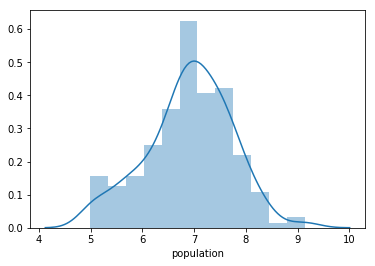

In [24]:
# histogram of population spread of all countries in 2018 

sns.distplot(np.log10(now['population']));

In [27]:
help(sns.relplot)

Help on function relplot in module seaborn.relational:

relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='brief', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)
    Figure-level interface for drawing relational plots onto a FacetGrid.
    
    This function provides access to several different axes-level functions
    that show the relationship between two variables with semantic mappings
    of subsets. The ``kind`` parameter selects the underlying axes-level
    function to use:
    
    - :func:`scatterplot` (with ``kind="scatter"``; the default)
    - :func:`lineplot` (with ``kind="line"``)
    
    Extra keyword arguments are passed to the underlying function, so you
    should refer to the documentation for each to see kind-specific options.

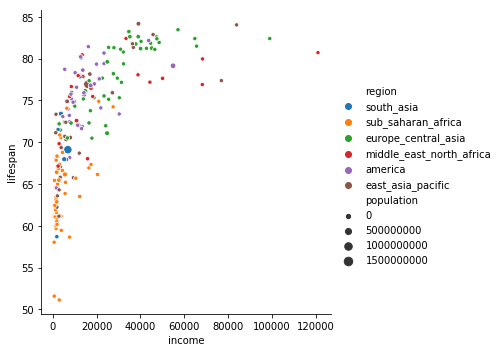

In [26]:
# Plot of income vs lifespan 

sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now) ;

## Analyze outliers

In [28]:
# finding countries with income < 80k

now[now['income'] > 80000].sort_values('income')

,year,income,lifespan,population,country,region
31895,2018,83888,84.030,5791901,Singapore,east_asia_pacific
22212,2018,99034,82.390,590321,Luxembourg,europe_central_asia
30362,2018,121033,80.710,2694849,Qatar,middle_east_north_africa


In [29]:
# finding countries with income < 1k

now[now['income'] < 1000].sort_values('income')

,year,income,lifespan,population,country,region
32771,2018,629,58.030,15181925,Somalia,sub_saharan_africa
6178,2018,689,51.580,4737423,Central African Republic,sub_saharan_africa
2455,2018,691,61.140,11216450,Burundi,sub_saharan_africa
7711,2018,751,62.420,84004989,"Congo, Dem. Rep.",sub_saharan_africa
20898,2018,801,65.430,4853516,Liberia,sub_saharan_africa
26420,2018,949,62.450,22311375,Niger,sub_saharan_africa


In [31]:
# finding countries with lifespan < 60
now[now['lifespan'] < 60].sort_values('lifespan')

,year,income,lifespan,population,country,region
21774,2018,2960,51.120,2263010,Lesotho,sub_saharan_africa
6178,2018,689,51.580,4737423,Central African Republic,sub_saharan_africa
32771,2018,629,58.030,15181925,Somalia,sub_saharan_africa
34523,2018,7604,58.640,1391385,Swaziland,sub_saharan_africa
218,2018,1867,58.690,36373176,Afghanistan,south_asia
40217,2018,3865,59.450,17609178,Zambia,sub_saharan_africa
14328,2018,1547,59.660,1907268,Guinea-Bissau,sub_saharan_africa


In [0]:
# Function to annotate any country dot in out graph 

def plot_annotate_country(country_name, text_ann):
  country = now[now['country'] == country_name]
  country_income = country['income'].values[0]
  country_lifespan = country['lifespan'].values[0]
  sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)
  plt.text(x=country_income-5000, y=country_lifespan+1, s=country_name)
  plt.title(f'{country_name} {text_ann}')

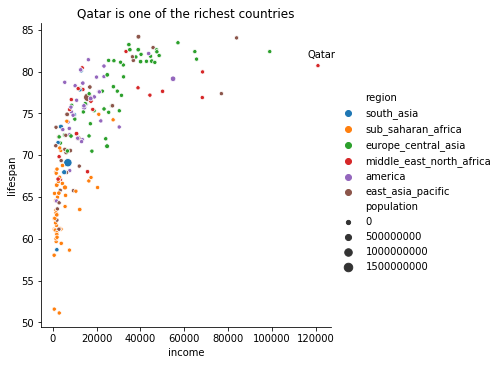

In [34]:
country_name = 'Qatar'
text_ann = 'is one of the richest countries'
plot_annotate_country(country_name, text_ann)

## Plot multiple years

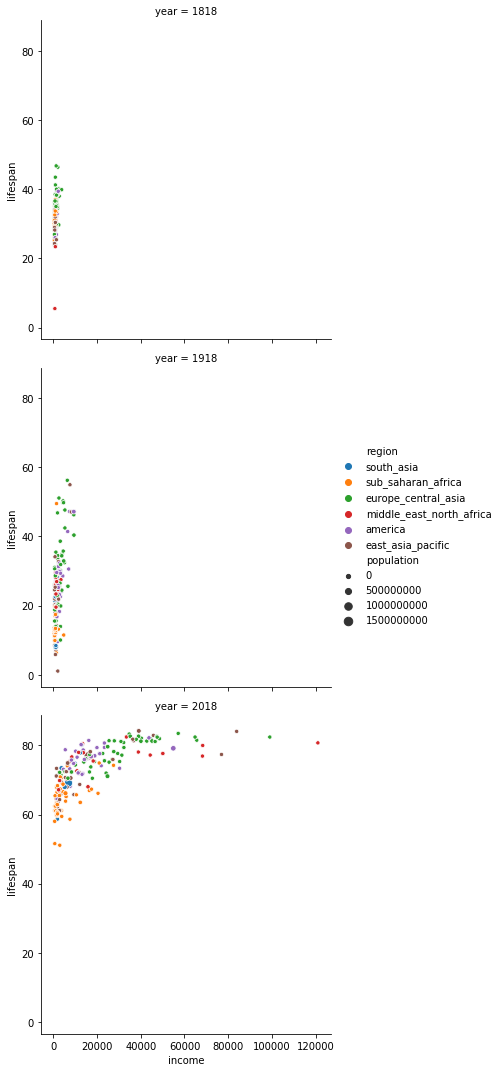

In [36]:
#relplot to plot mutiple year's graphs

sns.relplot(x='income', 
            y='lifespan', 
            hue='region', 
            size='population', 
            data=df[df['year'].isin(range(1818, 2019, 100))],
            row='year');

## Point out a story

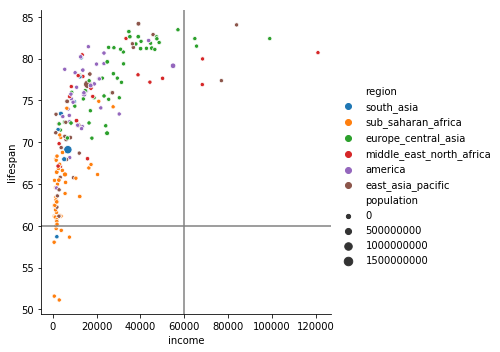

In [40]:
# We can draw a vertical and horizontal line on graph to vivually depict outliers

sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now);
plt.axhline(y=60, color='grey');
plt.axvline(x=60000, color='grey');

In [0]:
# we can create a plot of income vs lifespan across mutiple years 

from google.colab import widgets



In [48]:
#help(widgets.TabBar)
help (zip)

Help on class zip in module builtins:

class zip(object)
 |  zip(iter1 [,iter2 [...]]) --> zip object
 |  
 |  Return a zip object whose .__next__() method returns a tuple where
 |  the i-th element comes from the i-th iterable argument.  The .__next__()
 |  method continues until the shortest iterable in the argument sequence
 |  is exhausted and then it raises StopIteration.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

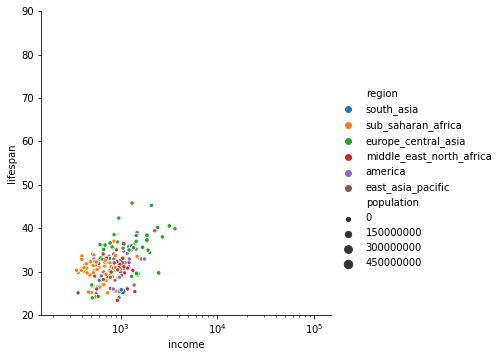

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

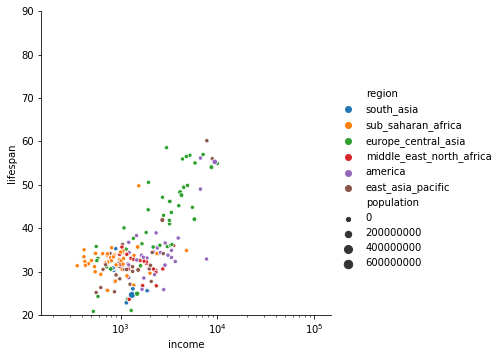

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

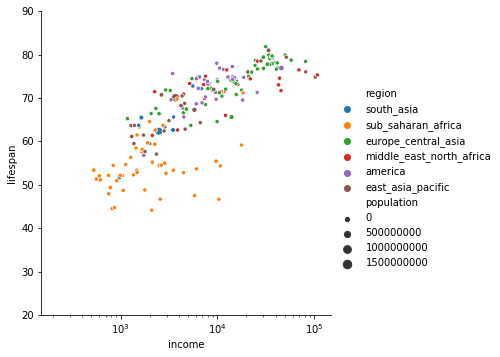

<IPython.core.display.Javascript object>

In [50]:
#to create a plot with selectable tabs for different graphs

years = [1819, 1919, 2000]
tb = widgets.TabBar([str(year) for year in years])
for tab, year in zip(tb, years):
    sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=df[df.year==year])

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90));

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project